In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings

warnings.filterwarnings("ignore")


df = pd.read_csv("AB_NYC_2019.csv")

print("Data Types:\n", df.dtypes)

Data Types:
 id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [9]:

missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

duplicate_count = df.duplicated().sum()
if duplicate_count:
    print("No of Duplicate Values:", duplicate_count)
    df.drop_duplicates(inplace=True)
else:
    print("No Duplicate Values")

Missing Values:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64
No Duplicate Values


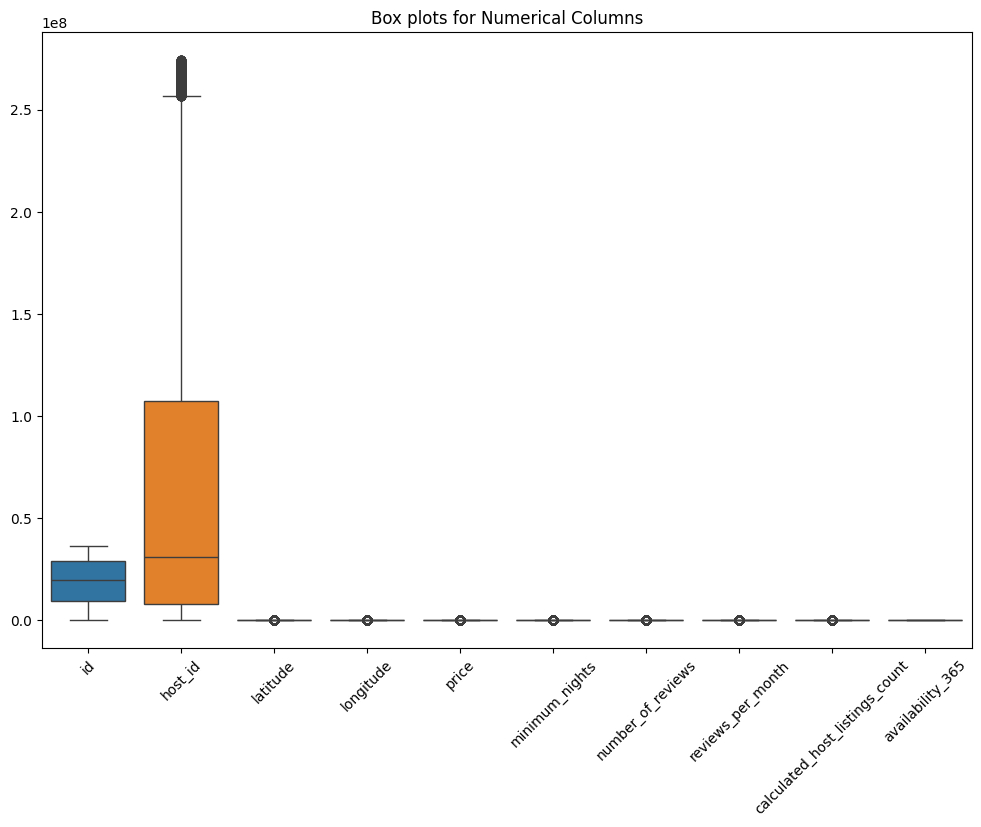

In [10]:
df[categorical_columns] = df[categorical_columns].applymap(lambda x: x.lower() if isinstance(x, str) else x)


plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Box plots for Numerical Columns')
plt.xticks(rotation=45)
plt.show()

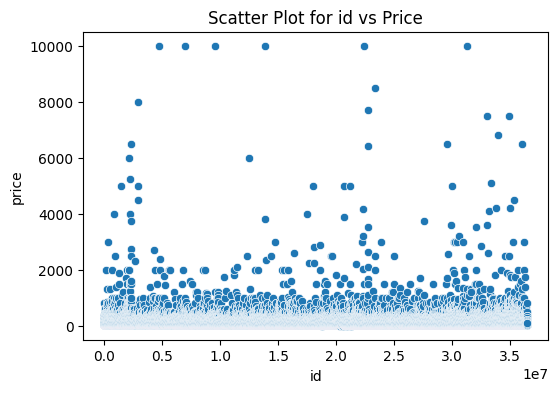

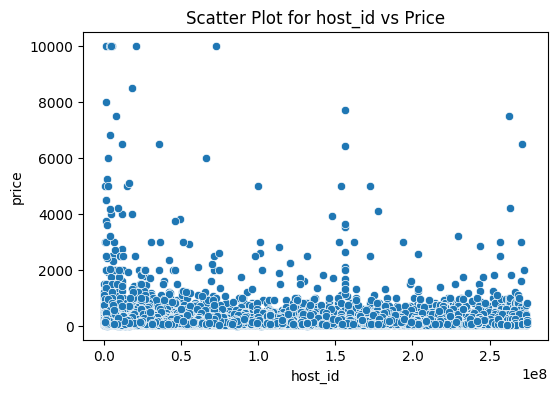

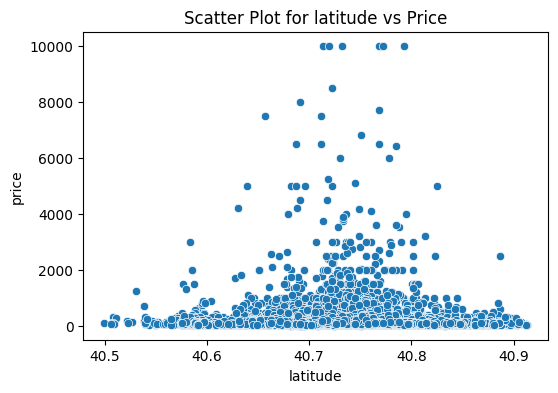

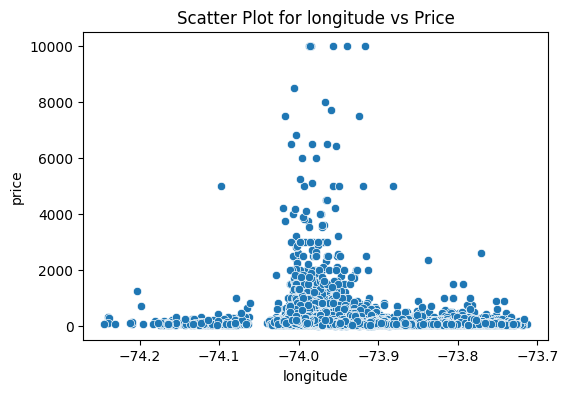

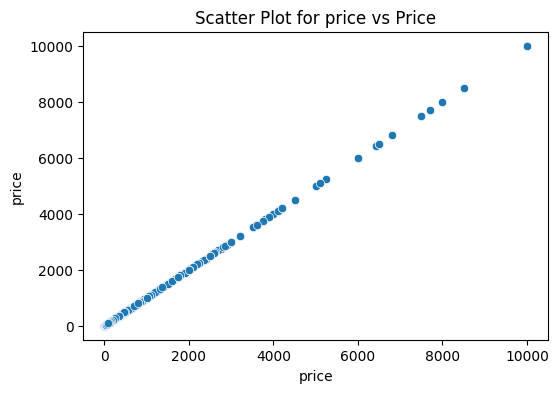

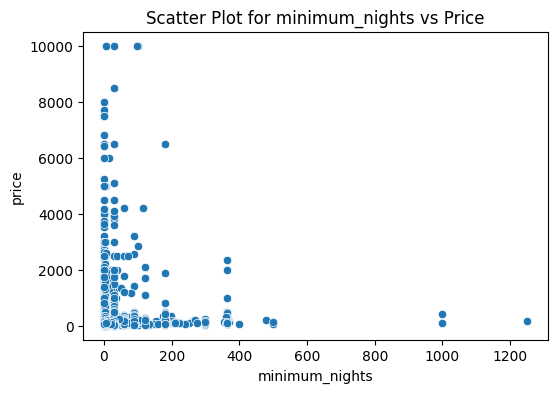

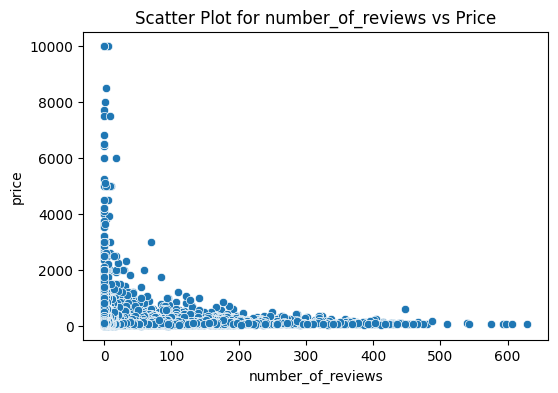

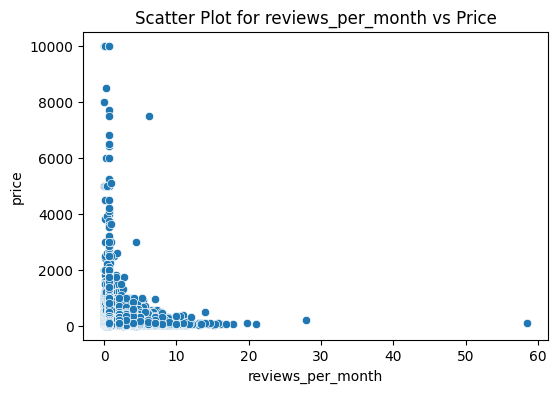

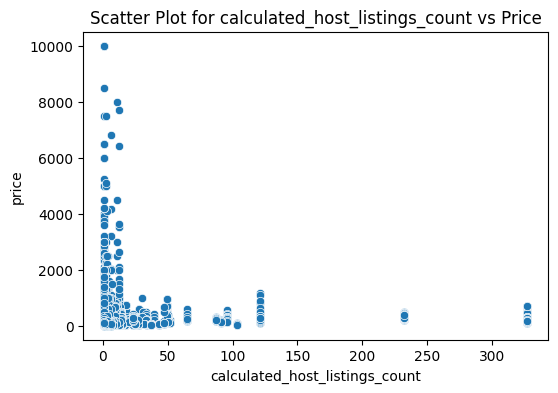

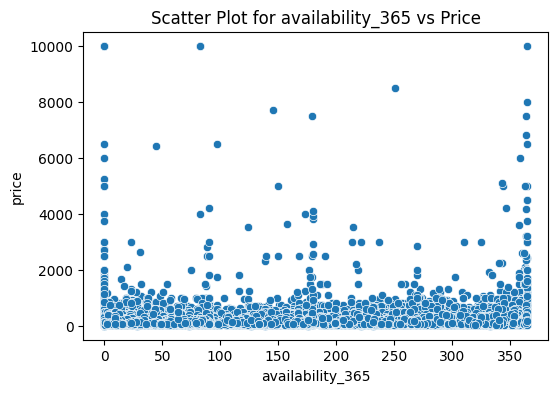

In [11]:

for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=column, y='price', data=df)
    plt.title(f'Scatter Plot for {column} vs Price')
    plt.show()



for column in numerical_columns:
    z_scores = zscore(df[column])
    df[column] = np.where(z_scores > 3, df[column].quantile(0.99), df[column])
    df[column] = np.where(z_scores < -3, df[column].quantile(0.01), df[column])


for column in numerical_columns:
    df[column] = (df[column] - df[column].mean()) / df[column].std()


df.to_csv("cleaned_data.csv", index=False)
